# Exploring Stackoverflow Anual Survey 2019

This is the first project for Udacity's Data Scientist Nanodegree. The data used in this project was obtained from [Stack Overflow Annual Developer Survey](https://insights.stackoverflow.com/survey)  The whole project is implemented following "Cross-Industry Standard Process for Data Mining (CRISP-DM)" process, an industry standard for data analysis. It includes 6 steps: 

1. Business Understanding.
2. Data Understanding.
3. Prepare Data.
4. Data Modeling.
5. Evaluate the Results
6. Deploy.

In this project, we will follow the above steps to explore the data. 

## 1. Business Understanding
Being a female in technology myself, I am mostly interested in what female scientists feels working/studyin in this field. Therefore I would like to find answers to the following questions:

1. What are the distributions of females with respect to country, ethnicity, level of education, etc?
2. What is the most popular type of development among females?
3. What does the data suggest of males and females in terms of salary and working hours? 
4. What factors associat with high salary, eg. type of development, education level, etc.?
5. Female with what skills receive the highest salary?

With these questions in mind, let's get into the data.

## 2. Data Understanding
First of all, let's import some useful libriaries and load the data.

In [1]:
# Import libraries we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import data_process as p
%matplotlib inline

# load the data and take a look at the first several rows to get a big picture
sof = pd.read_csv("data/survey_results_public.csv")
schema = pd.read_csv('data/survey_results_schema.csv')
sof.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [2]:
# Total rows and columns
sof.shape

(88883, 85)

In [3]:
# Schema data : descriptions for each column
schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...


The dataset has 88883 rows and 85 columns, let's take a look at missing values in general:

In [4]:
p.missing_ratio(sof).head()

,Count,Ratio
BlockchainOrg,40708,45.799534
CodeRevHrs,39093,43.982539
ConvertedComp,33060,37.194964
CompTotal,32938,37.057705
MiscTechWorkedWith,29297,32.961309


The column that has the most missing values is BlockchanOrg, lets get the description of it to see what the question is:

In [5]:
# Get the question description for column 'BlockchainOrg'
p.get_description('BlockchainOrg',schema)

'How is your organization thinking about or implementing blockchain technology?'

It turns out that this is an open question. I personally don't like open questions in the survey and I think most people feels the same way becasue it takes time to think and organize words. And this might be one of the reasons that people leave this question blank. 

In [6]:
# Get the question description for column 'CodeRevHrs' and 'ConvertedComp'
p.get_description('CodeRevHrs',schema),p.get_description('ConvertedComp',schema)

('On average, how many hours per week do you spend on code review?',
 'Salary converted to annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks.')

'CodeRevHrs' and 'ConvertedComp' also have large amount of missing values, the reason could be that both questions invlove calculation, which takes time. In addition, many people may not want to disclose their salary. 



## 3. & 4. Prepare Data and Data Modeling
Now, let's get to prepare our data and answer the questions.
First, we will look at the big picture of the gender distribution

In [7]:
gender = sof['Gender'].value_counts()
gender

Man                                                            77919
Woman                                                           6344
Non-binary, genderqueer, or gender non-conforming                597
Man;Non-binary, genderqueer, or gender non-conforming            181
Woman;Non-binary, genderqueer, or gender non-conforming          163
Woman;Man                                                        132
Woman;Man;Non-binary, genderqueer, or gender non-conforming       70
Name: Gender, dtype: int64

The above result shows that this is a multiple chioce quesion and one column content would have several answers, separated by semicolon. We need to split these strings by semicolon and count the total in each category. Here I used a function from parpare_data.py module for this purpose. 

In [69]:
gender_splitted = p.split_column_content(sof,'Gender')
gender_splitted.reset_index(drop=True).head()

0    Man
1    Man
2    Man
3    Man
4    Man
dtype: object

Nice! This looks good. Let's count values and plot:

                                                type     ratio
0                                                Man  0.910256
1                                              Woman  0.077992
2  Non-binary, genderqueer, or gender non-conforming  0.011753


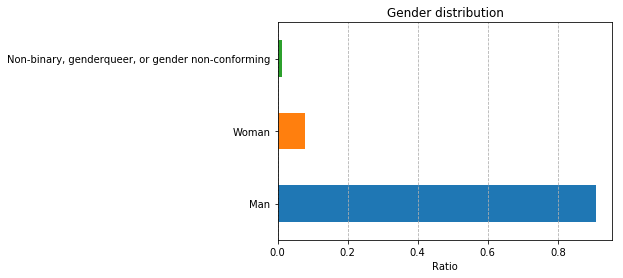

In [56]:
p.count_and_plot(gender_splitted, 'Gender distribution' )

We can see that male developers occupy 91% of the total population while female only 7.8%, which shold be a suprising finding since gender gap is a well known issue in IT industry. Rather than the gap, I am inerested in other aspects of female in tech field such as the questions I presiously listed. 

Now, let's try to answer these questions: 
### Q1. What are the distributions of females with respect to country, ethnicity, level of education, etc?

In [11]:
# Choose data related to women
women_df = sof[sof['Gender']=='Woman']
# Drop columns with all nan values
women_df = women_df.dropna(how='all', axis=1)

# Choose data related to men for future use
men_df = sof[sof['Gender']=='Man']
# Drop columns with all nan values
men_df = men_df.dropna(how='all', axis=1)

women_df.shape

(6344, 85)

                                                type     ratio
0                       White or of European descent  0.634672
1                                        South Asian  0.089455
2                                         East Asian  0.068397
3                          Hispanic or Latino/Latina  0.061214
4                        Black or of African descent  0.048808
5                                     Middle Eastern  0.041136
6                                        Multiracial  0.025139
7                                           Biracial  0.021058
8  Native American, Pacific Islander, or Indigeno...  0.010121


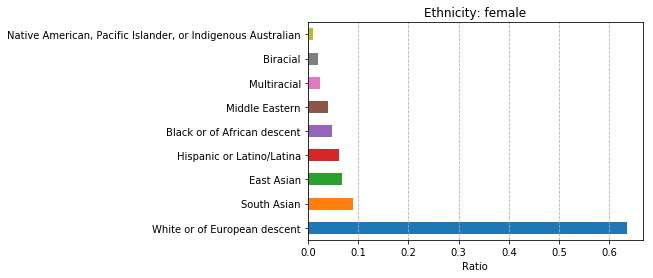

In [12]:
# Plot the top 10 ethniciy in female
# p.plot_value_counts(women_df,'Ethnicity') 
bar_width = 0.3


p.count_and_plot(p.split_column_content(women_df,'Ethnicity'),'Ethnicity: female')

                                                type     ratio
0                       White or of European descent  0.657945
1                                        South Asian  0.111909
2                          Hispanic or Latino/Latina  0.066281
3                                         East Asian  0.051928
4                                     Middle Eastern  0.043447
5                        Black or of African descent  0.031435
6                                        Multiracial  0.020105
7                                           Biracial  0.010648
8  Native American, Pacific Islander, or Indigeno...  0.006300


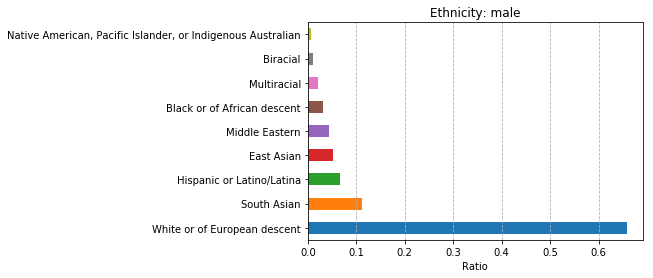

In [13]:
p.count_and_plot(p.split_column_content(men_df,'Ethnicity'),'Ethnicity: male')

The ethnicity distributions are about the same between women and men: the percentage of White or European desent are both overwhelmingly higer than any other races for both genders, followed by South Asian. Then, it shows that there are more women of East Asian origin than men in tech field.

             type     ratio
0   United States  0.329760
1           India  0.089849
2  United Kingdom  0.067150
3          Canada  0.049023
4         Germany  0.046658
5          France  0.017970
6       Australia  0.017497
7     Netherlands  0.017024
8          Poland  0.017024
9         Romania  0.015132


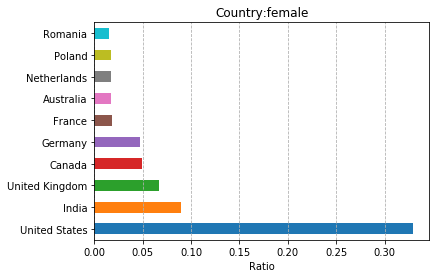

In [14]:
p.count_and_plot(p.split_column_content(women_df,'Country'),'Country:female')

             type     ratio
0   United States  0.227159
1           India  0.100130
2         Germany  0.067878
3  United Kingdom  0.064939
4          Canada  0.037423
5          France  0.027978
6          Brazil  0.023255
7          Poland  0.022549
8       Australia  0.021612
9     Netherlands  0.021510


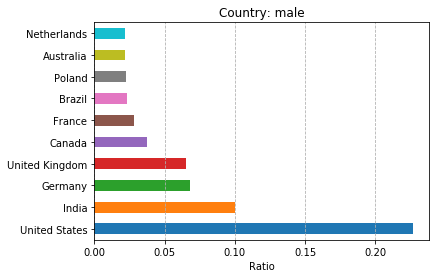

In [15]:
p.count_and_plot(p.split_column_content(men_df,'Country'),'Country: male')

In this session, we explored country that people currently reside and compared the result of female and male. A 

                                                type     ratio
0           Bachelor’s degree (BA, BS, B.Eng., etc.)  0.501617
1        Master’s degree (MA, MS, M.Eng., MBA, etc.)  0.240220
2  Some college/university study without earning ...  0.094083
3  Secondary school (e.g. American high school, G...  0.073553
4                                   Associate degree  0.031684
5          Other doctoral degree (Ph.D, Ed.D., etc.)  0.030068
6                 Professional degree (JD, MD, etc.)  0.012609
7                          Primary/elementary school  0.008083
8             I never completed any formal education  0.008083


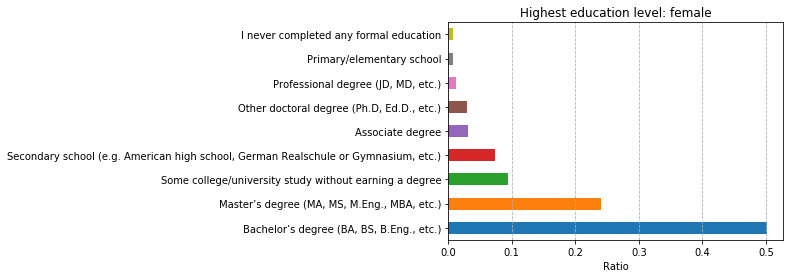

In [16]:
p.count_and_plot(p.split_column_content(women_df,'EdLevel'),'Highest education level: female')

                                                type     ratio
0           Bachelor’s degree (BA, BS, B.Eng., etc.)  0.450009
1        Master’s degree (MA, MS, M.Eng., MBA, etc.)  0.226783
2  Some college/university study without earning ...  0.123756
3  Secondary school (e.g. American high school, G...  0.101596
4                                   Associate degree  0.034067
5          Other doctoral degree (Ph.D, Ed.D., etc.)  0.027582
6                          Primary/elementary school  0.016738
7                 Professional degree (JD, MD, etc.)  0.013968
8             I never completed any formal education  0.005501


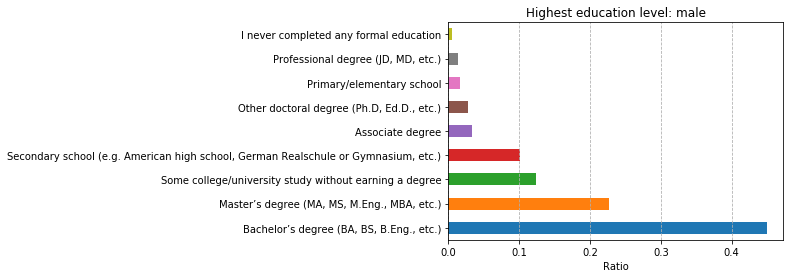

In [17]:
p.count_and_plot(p.split_column_content(men_df,'EdLevel'),'Highest education level: male')

                                                type     ratio
0  Computer science, computer engineering, or sof...  0.526707
1  Information systems, information technology, o...  0.064096
2  A natural science (ex. biology, chemistry, phy...  0.056672
3  A humanities discipline (ex. literature, histo...  0.055405
4  Another engineering discipline (ex. civil, ele...  0.053775
5  A social science (ex. anthropology, psychology...  0.053051
6                          Mathematics or statistics  0.051602
7                      Web development or web design  0.048162
8  Fine arts or performing arts (ex. graphic desi...  0.036212
9  A business discipline (ex. accounting, finance...  0.035307


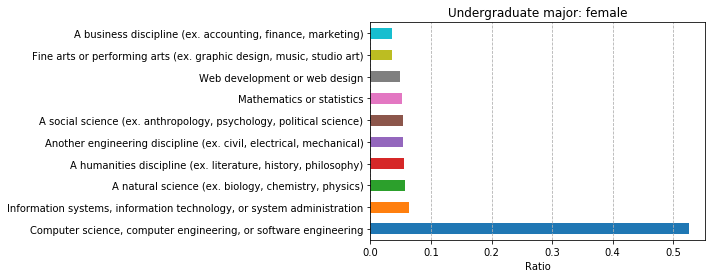

In [18]:
p.count_and_plot(p.split_column_content(women_df,'UndergradMajor'),'Undergraduate major: female')

                                                type     ratio
0  Computer science, computer engineering, or sof...  0.633520
1  Another engineering discipline (ex. civil, ele...  0.085542
2  Information systems, information technology, o...  0.070324
3                      Web development or web design  0.044377
4  A natural science (ex. biology, chemistry, phy...  0.041195
5                          Mathematics or statistics  0.037954
6  A business discipline (ex. accounting, finance...  0.023937
7  A humanities discipline (ex. literature, histo...  0.017559
8  A social science (ex. anthropology, psychology...  0.014872
9  Fine arts or performing arts (ex. graphic desi...  0.014122


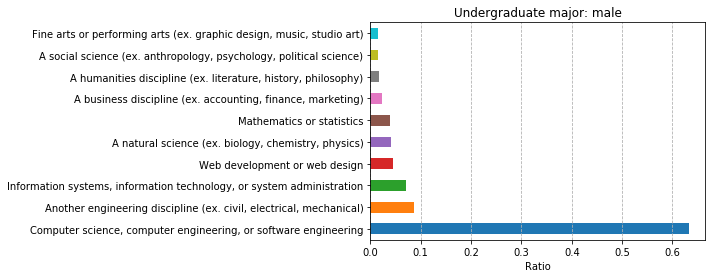

In [19]:
p.count_and_plot(p.split_column_content(men_df,'UndergradMajor'),'Undergraduate major: male')

                                                type     ratio
0  Taught yourself a new language, framework, or ...  0.253143
1  Taken an online course in programming or softw...  0.208135
2  Received on-the-job training in software devel...  0.142948
3                        Participated in a hackathon  0.087322
4                Contributed to open source software  0.078024
5  Taken a part-time in-person course in programm...  0.066455
6  Participated in online coding competitions (e....  0.065927
7  Participated in a full-time developer training...  0.063867
8  Completed an industry certification program (e...  0.034179


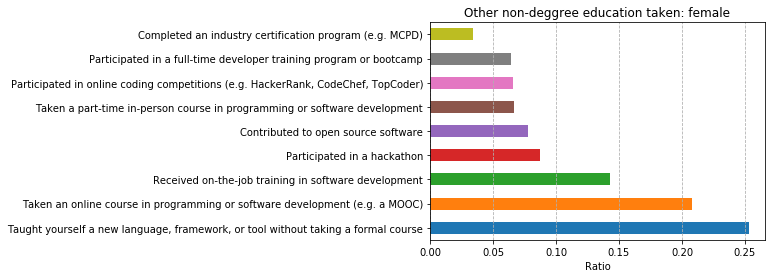

In [20]:
p.count_and_plot(p.split_column_content(women_df,'EduOther'),'Other non-deggree education taken: female')

                                                type     ratio
0  Taught yourself a new language, framework, or ...  0.262949
1  Taken an online course in programming or softw...  0.182441
2                Contributed to open source software  0.128871
3  Received on-the-job training in software devel...  0.118863
4                        Participated in a hackathon  0.079162
5  Participated in online coding competitions (e....  0.078940
6  Taken a part-time in-person course in programm...  0.056476
7  Completed an industry certification program (e...  0.046898
8  Participated in a full-time developer training...  0.045399


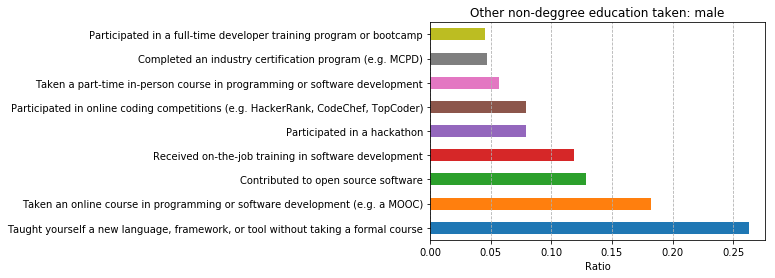

In [21]:
p.count_and_plot(p.split_column_content(men_df,'EduOther'),'Other non-deggree education taken: male')

### Q2. What are the challenges that females are facing in tech field? 

In [22]:
p.get_description('WorkChallenge',schema)

'Of these options, what are your greatest challenges to productivity as a developer? Select up to 3:'

                                                type     ratio
0                       Distracting work environment  0.161705
1                                           Meetings  0.140308
2             Being tasked with non-development work  0.131935
3                 Not enough people for the workload  0.126522
4                    Lack of support from management  0.104110
5                             Toxic work environment  0.090663
6  Non-work commitments (parenting, school work, ...  0.083474
7                               Time spent commuting  0.080768
8               Inadequate access to necessary tools  0.080514


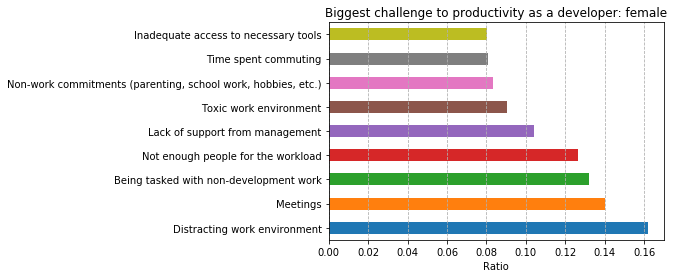

In [23]:
p.count_and_plot(p.split_column_content(women_df,'WorkChallenge'), 'Biggest challenge to productivity as a developer: female')

                                                type     ratio
0                       Distracting work environment  0.162504
1             Being tasked with non-development work  0.143066
2                                           Meetings  0.142557
3                 Not enough people for the workload  0.130735
4                    Lack of support from management  0.102924
5               Inadequate access to necessary tools  0.082028
6                             Toxic work environment  0.079636
7                               Time spent commuting  0.079528
8  Non-work commitments (parenting, school work, ...  0.077021


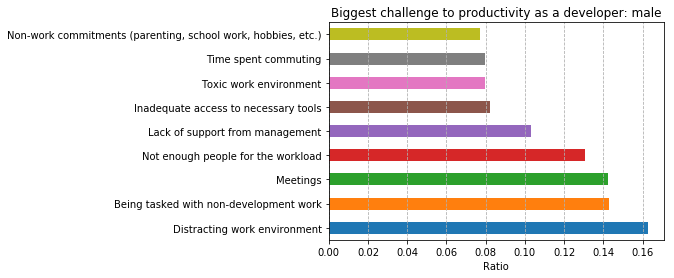

In [24]:
p.count_and_plot(p.split_column_content(men_df,'WorkChallenge'), 'Biggest challenge to productivity as a developer: male')

### Q3. What does the data suggest of males and females in terms of salary and working hours? 
First, let's pull out all the numerical variables from women_df and see the overall statistics

In [58]:
women_df.describe()
# women_df.groupby('DevType').agg({'ConvertedComp': 'median', 'WorkWeekHrs':'median'}).reset_index()


,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,6344.000000,3.768000e+03,3.762000e+03,4390.000000,3149.000000,5636.000000
mean,44507.677333,2.307483e+11,1.148642e+05,41.813683,4.770276,29.495724
std,25776.051327,1.416424e+13,2.571464e+05,75.488601,5.239644,8.350789
min,12.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22031.000000,2.200000e+04,2.668725e+04,39.000000,2.000000,24.000000
50%,44851.500000,6.100000e+04,5.753200e+04,40.000000,4.000000,28.000000
75%,66698.500000,1.054878e+05,9.899100e+04,40.000000,5.000000,33.000000
max,88864.000000,8.694580e+14,2.000000e+06,4850.000000,90.000000,99.000000


In [62]:
men_df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,77919.000000,5.061100e+04,5.050300e+04,58057.000000,44976.000000,71566.000000
mean,44437.350659,1.975873e+11,1.274582e+05,42.143995,5.063939,30.424480
std,25644.559035,4.445059e+13,2.848084e+05,33.022336,5.345024,9.162677
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22236.500000,2.000000e+04,2.566800e+04,40.000000,2.000000,24.000000
50%,44430.000000,6.200000e+04,5.725400e+04,40.000000,4.000000,29.000000
75%,66645.000000,1.200000e+05,1.000000e+05,45.000000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4125.000000,99.000000,99.000000


The average annual salary that female earn is \$114,864.2, which is slightly less than female of \$127,458.2. 
The average working hours per week for female is \$41.8, and \$42.1 for male. 
If we calclulate the salary per hour, we can get \$55 per hour for female and \$60.6 per hour for male. 


### Q4. What factors associate with high salary, eg. type of development, education level, etc.?
The first factor that I came up with is type of development since difference tech specalizations may affect salary. So I will group the data by development types, then calculate the median salary for each type and then sort the salary in descending order. 

In [36]:
dev_salary = women_df.groupby('DevType').agg({'ConvertedComp': 'median'}).reset_index().dropna().sort_values('ConvertedComp',axis =0,ascending=False)
dev_salary

,DevType,ConvertedComp
432,Data or business analyst;Student,2000000.0
261,Data or business analyst;Data scientist or mac...,2000000.0
282,Data or business analyst;Data scientist or mac...,2000000.0
842,"Designer;Developer, full-stack;Developer, QA o...",2000000.0
402,"Data or business analyst;Developer, embedded a...",2000000.0
700,"Designer;Developer, back-end;DevOps specialist...",2000000.0
917,"Developer, back-end;Developer, desktop or ente...",2000000.0
701,"Designer;Developer, back-end;Developer, QA or ...",2000000.0
493,Data scientist or machine learning specialist;...,2000000.0
1251,"Developer, front-end;Educator;Engineer, data",1680000.0


In [91]:
def split_column(column_to_split, delimeter, column_to_store, df):
    """
    Method to split a columns values by a provided delimeter while
    retaining the associated value of another column.
    
    :param str column_to_split: column whose values are to be split
    :param str delimeter: delimeter to split by
    :param str columns_to_store: column who's data must be stored along split rows
    :param DataFrame df: dataframe to use
    """
    split_col = pd.DataFrame(columns = [column_to_split, column_to_store])
    for index, row in df.iterrows():
        columns = row[column_to_split].split(delimeter)
        for c in columns:
            split_col.loc[len(split_col)] = [c, row[column_to_store]]
    return split_col

# dev_s_f = split_column('DevType',';','ConvertedComp',dev_salary)
# dev_group = dev_s_f.groupby('DevType').agg({'ConvertedComp':'median'}).reset_index().sort_values('ConvertedComp',ascending=False)
# dev_group
dev_salary_f = p.split_and_concat(dev_salary)

,DevType,ConvertedComp
16,"Engineer, site reliability",101542.0
21,Senior executive/VP,98000.0
17,Engineering manager,96456.0
5,DevOps specialist,74748.0
18,Marketing or sales professional,61320.0
2,Data scientist or machine learning specialist,61074.0
19,Product manager,60000.0
1,Data or business analyst,60000.0
15,"Engineer, data",59688.0
11,"Developer, full-stack",56490.0


In [75]:
dev_salary_m = men_df.groupby('DevType').agg({'ConvertedComp': 'median'}).reset_index().dropna().sort_values('ConvertedComp',axis =0,ascending=False)
dev_salary_m

,DevType,ConvertedComp
9410,"Developer, back-end;Developer, desktop or ente...",2000000.0
6861,"Database administrator;Developer, back-end;Dev...",2000000.0
7763,"Database administrator;Developer, desktop or e...",2000000.0
854,Academic researcher;Data scientist or machine ...,2000000.0
5265,Data scientist or machine learning specialist;...,2000000.0
2699,Data or business analyst;Data scientist or mac...,2000000.0
166,Academic researcher;Data or business analyst;D...,2000000.0
891,Academic researcher;Data scientist or machine ...,2000000.0
12088,"Developer, game or graphics;Product manager",2000000.0
9575,"Developer, back-end;Developer, desktop or ente...",2000000.0


In [73]:
top_100_dev = dev_salary.reset_index(inplace=True)
top_100_dev
# p.count_and_plot(p.split_column_content(top_100_dev,'DevType'),'Top development types with higest salary')

In [28]:
orgsize_salary = women_df.groupby('OrgSize').agg({'ConvertedComp': 'median'}).reset_index().dropna().sort_values('ConvertedComp',axis =0,ascending=False)
orgsize_salary

,OrgSize,ConvertedComp
2,"10,000 or more employees",80000.0
0,"1,000 to 4,999 employees",71600.0
6,"5,000 to 9,999 employees",66000.0
3,100 to 499 employees,63240.0
7,500 to 999 employees,61071.0
5,20 to 99 employees,49494.0
8,"Just me - I am a freelancer, sole proprietor, ...",40080.0
4,2-9 employees,39768.0
1,10 to 19 employees,38496.0


In [29]:
ed_salary = women_df.groupby('EdLevel').agg({'ConvertedComp': 'median'}).reset_index().dropna().sort_values('ConvertedComp',axis =0,ascending=False)
ed_salary

,EdLevel,ConvertedComp
4,"Other doctoral degree (Ph.D, Ed.D., etc.)",75624.0
2,I never completed any formal education,65651.0
1,"Bachelor’s degree (BA, BS, B.Eng., etc.)",63948.0
5,Primary/elementary school,59376.0
3,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",55178.0
0,Associate degree,53437.0
8,Some college/university study without earning ...,50771.0
7,"Secondary school (e.g. American high school, G...",27492.0
6,"Professional degree (JD, MD, etc.)",23280.0


In [30]:
lang_salary = women_df.groupby('LanguageWorkedWith').agg({'ConvertedComp': 'mean'}).reset_index().dropna().sort_values('ConvertedComp',axis =0,ascending=False)
lang_salary

,LanguageWorkedWith,ConvertedComp
153,Assembly;Bash/Shell/PowerShell;HTML/CSS;Java;J...,2000000.0
1036,Bash/Shell/PowerShell;HTML/CSS;PHP;Python,2000000.0
846,Bash/Shell/PowerShell;Go;HTML/CSS;JavaScript;P...,2000000.0
833,Bash/Shell/PowerShell;Go;HTML/CSS;Java;JavaScr...,2000000.0
304,Assembly;HTML/CSS;JavaScript;Python;SQL,2000000.0
2325,Java;JavaScript;Other(s):,2000000.0
1273,C#;HTML/CSS;JavaScript;PHP;Python;R;VBA,2000000.0
1486,C++;Go;Java;Python;Scala,2000000.0
73,Assembly;Bash/Shell/PowerShell;C;C++;C#;HTML/C...,2000000.0
2227,HTML/CSS;JavaScript;Python;R;SQL,2000000.0


                    type     ratio
0             JavaScript  0.117882
1               HTML/CSS  0.113893
2                    SQL  0.098936
3                 Python  0.086749
4                   Java  0.078994
5  Bash/Shell/PowerShell  0.074673
6                     C#  0.053180
7                    C++  0.045314
8                    PHP  0.044095
9             TypeScript  0.040882


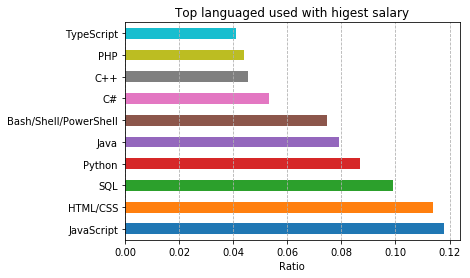

In [47]:
top_100_lang = lang_salary.reset_index(drop=True).loc[0:]
p.count_and_plot(p.split_column_content(top_100_lang,'LanguageWorkedWith'),'Top languaged used with higest salary')

In [31]:
women_df.groupby('').agg({'ConvertedComp': 'mean'}).reset_index().dropna().sort_values('ConvertedComp',axis =0,ascending=False)

KeyError: ''

### Q5. Female with what skills receive the highest annual salary?

# 5. 6. Results & Deploy